# Implementation

## Libraries

In [45]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Data

### Load data

In [46]:
seattle_listings_df = pd.read_csv('drafts/data/seattle/listings.csv')

### Seattle

In [47]:
print("Size of seattle data: ", seattle_listings_df.shape)

Size of seattle data:  (3818, 92)


#### Check Nan values

<AxesSubplot:title={'center':'Missing values per column, %'}>

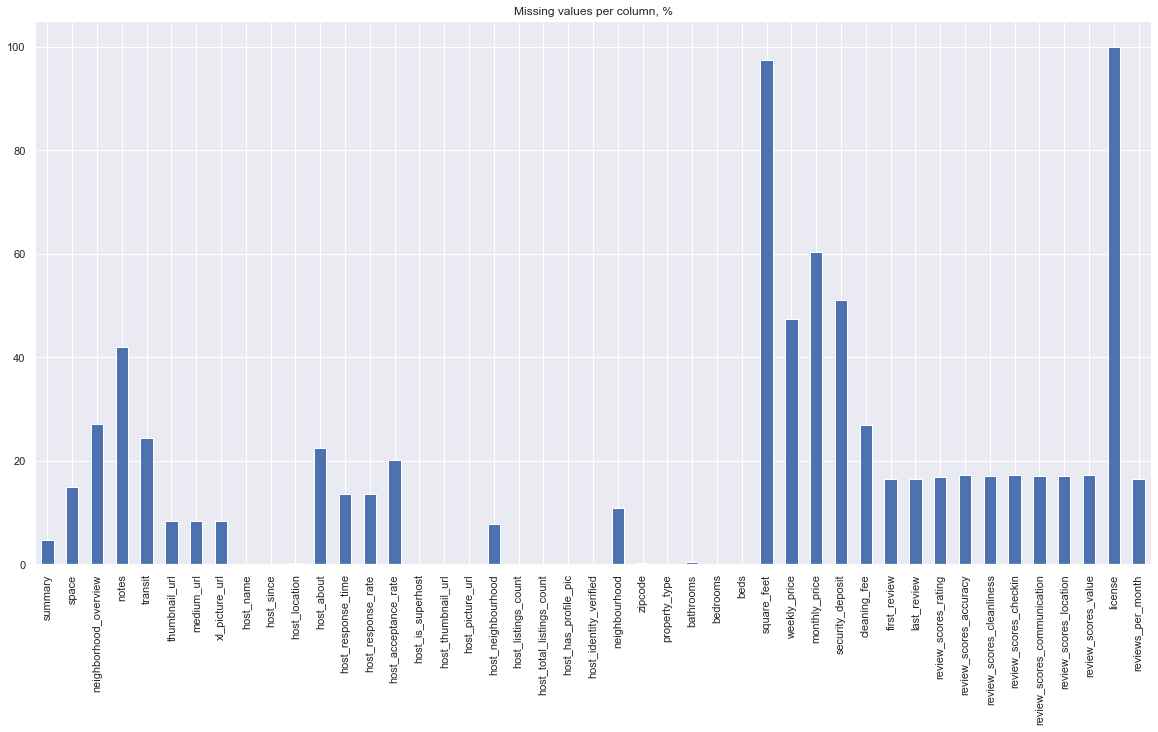

In [48]:
# Find percentage of missing values for each column
seattle_listings_missing_df = seattle_listings_df.isnull().mean()*100

# Filter out only columns, which have missing values
seattle_listings_columns_nan = seattle_listings_missing_df[seattle_listings_missing_df > 0]

# plot the results
seattle_listings_columns_nan.plot.bar(title='Missing values per column, %', figsize=(20,10))

#### Procesing data for visualization

In [49]:
# Drop unuse columns
cols = ['id','name','summary','longitude','latitude','space','description',
             'instant_bookable','neighborhood_overview','neighbourhood_cleansed',
             'host_id','host_name','host_since', 'host_response_time','street', 
             'zipcode','review_scores_rating','property_type','room_type','accommodates',
             'bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy',
             'number_of_reviews','price']

seattle_listings_df = seattle_listings_df[cols]

print('Size of seattle data before drop:', seattle_listings_df.shape)

Size of seattle data before drop: (3818, 28)


In [50]:
# Check duplicates values
print('Duplicate values:', seattle_listings_df.duplicated().sum())

Duplicate values: 0


##### Drop rows with Nan values

In [51]:
# Replace NaN values with 0
seattle_listings_df.fillna(0, inplace=True)

# Convert price columns to float type
priceDF = seattle_listings_df['price']
# Create an empty prices list
prices=[]

# Convert prices into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
# Replace the price column in the original with the new prices
seattle_listings_df['price'] = prices

In [52]:
seattle_listings_df = seattle_listings_df[seattle_listings_df['bedrooms'] > 0]
seattle_listings_df = seattle_listings_df[seattle_listings_df['bathrooms'] > 0]
seattle_listings_df = seattle_listings_df[seattle_listings_df['accommodates'] > 0]
seattle_listings_df = seattle_listings_df[seattle_listings_df['price'] > 0]
seattle_listings_df = seattle_listings_df[seattle_listings_df['beds'] > 0]
seattle_listings_df = seattle_listings_df[seattle_listings_df['review_scores_rating'] > 0]
seattle_listings_df = seattle_listings_df[seattle_listings_df['reviews_per_month'] > 0]

print('Size of Seattle data after drop rows:', seattle_listings_df.shape)

Size of Seattle data after drop rows: (2843, 28)


#### Understand data

In [53]:
seattle_listings_df.describe()

,id,longitude,latitude,host_id,review_scores_rating,accommodates,bathrooms,bedrooms,beds,reviews_per_month,number_of_reviews,price
count,2.843000e+03,2843.000000,2843.000000,2.843000e+03,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000
mean,4.942403e+06,-122.332919,47.629144,1.413725e+07,94.607809,3.476961,1.288955,1.444601,1.794935,2.011393,26.654942,129.582483
std,2.801748e+06,0.032056,0.043655,1.329298e+07,6.574044,2.053236,0.617842,0.804637,1.188653,1.759138,40.468911,94.089756
min,4.291000e+03,-122.417219,47.505088,4.193000e+03,20.000000,1.000000,0.500000,1.000000,1.000000,0.020000,1.000000,22.000000
25%,2.526267e+06,-122.355006,47.608123,3.030933e+06,93.000000,2.000000,1.000000,1.000000,1.000000,0.660000,4.000000,72.000000
50%,5.175631e+06,-122.329241,47.623861,9.207095e+06,96.000000,3.000000,1.000000,1.000000,1.000000,1.470000,13.000000,100.000000
75%,7.402526e+06,-122.309549,47.664020,2.329116e+07,100.000000,4.000000,1.500000,2.000000,2.000000,2.930000,31.000000,150.000000
max,1.024814e+07,-122.256081,47.733358,5.059621e+07,100.000000,16.000000,8.000000,7.000000,15.000000,10.950000,474.000000,1000.000000


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

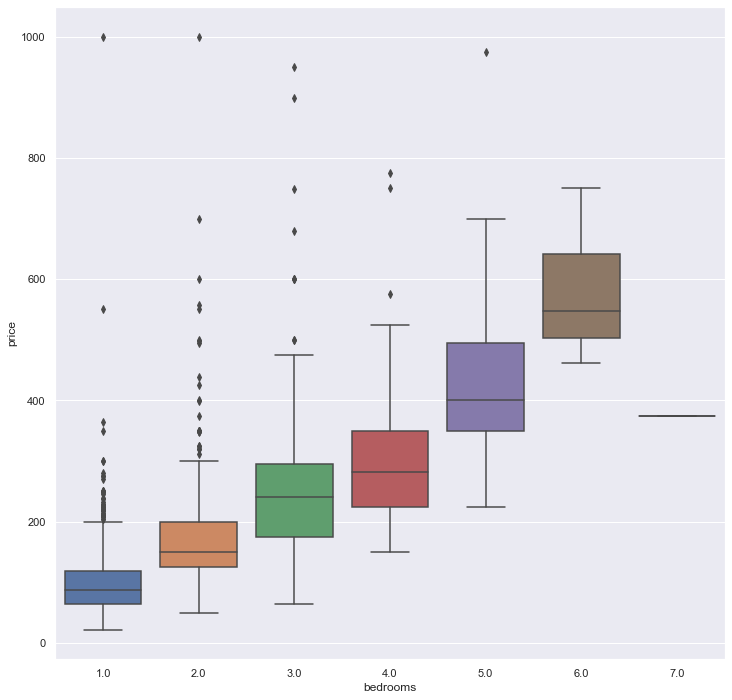

In [54]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(12,12))
sb.boxplot(x='bedrooms', y='price', data=seattle_listings_df[['bedrooms', 'price']])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

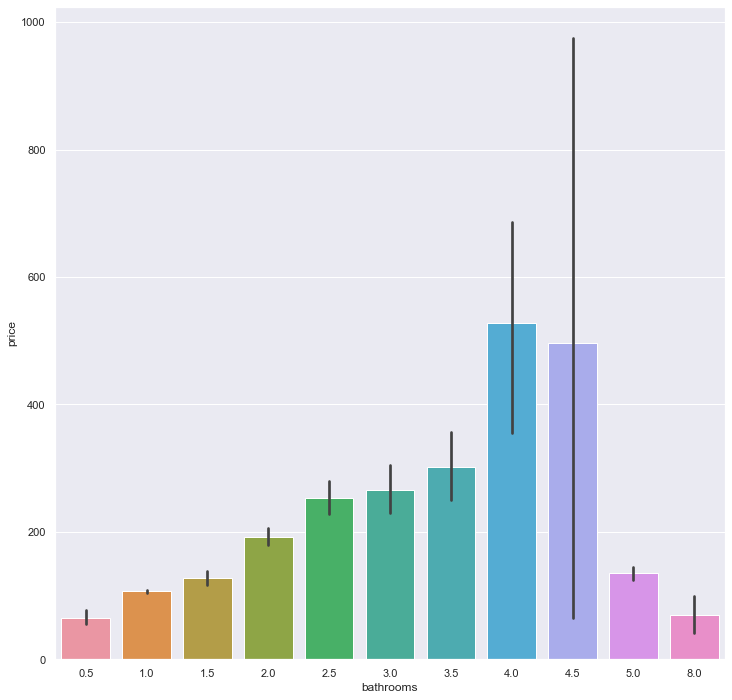

In [55]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bathrooms
plt.figure(figsize=(12,12))
sb.barplot(x='bathrooms', y='price', data=seattle_listings_df[['bathrooms', 'price']])

<AxesSubplot:xlabel='room_type', ylabel='property_type'>

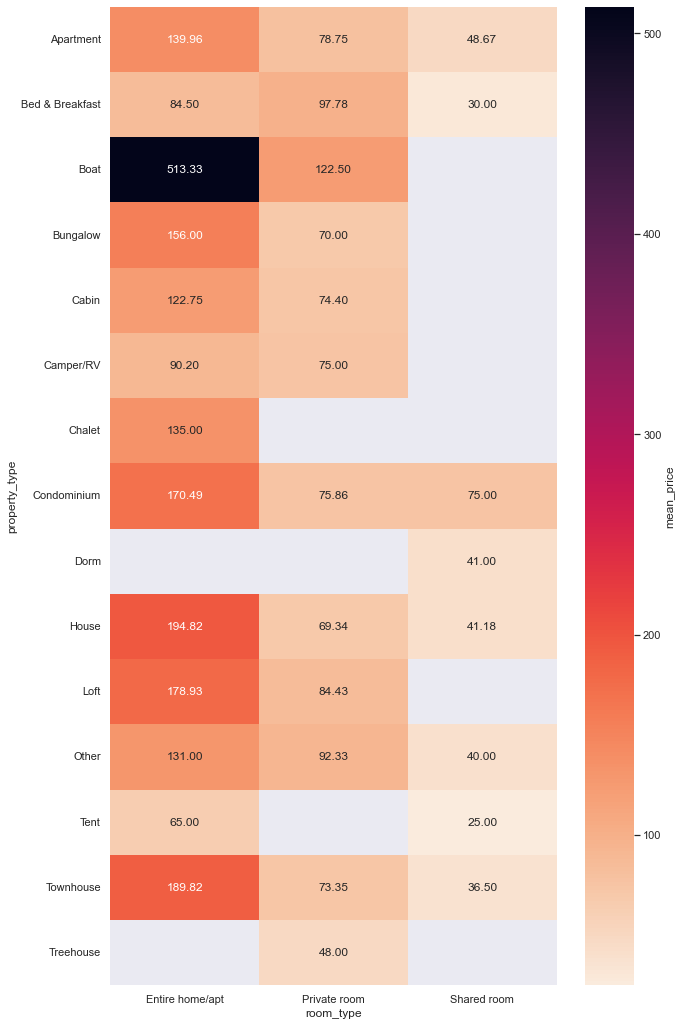

In [56]:
df_room_property = seattle_listings_df[['property_type','room_type', 'price']]
df_room_property = df_room_property.groupby(['property_type','room_type'])['price'].mean()
plt.figure(figsize = (10,18))
sb.heatmap(df_room_property.unstack(), 
           annot=True, fmt=".2f", 
           cmap = sb.cm.rocket_r, 
           cbar_kws={'label': 'mean_price'})

In [57]:
import nltk
from nltk.corpus import stopwords
import re

# Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenitiesDF = seattle_listings_df[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
# amenitiesDFtop=amenitiesDFTopper.head()
allemenities = ''
for index,row in amenitiesDFTopper.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

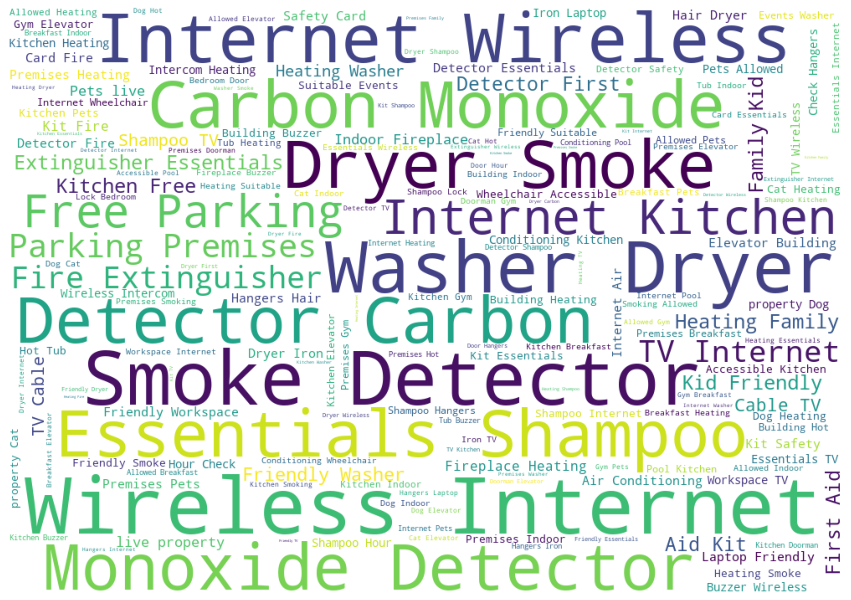

In [58]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Apply model

## Libraries

In [59]:
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate

# Scale
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

## Data

In [60]:
seattle_listings_df = pd.read_csv('drafts/data/seattle/listings.csv')

In [61]:
seattle_newListingsDF = seattle_listings_df[['room_type','property_type','bedrooms', 'bathrooms','amenities','number_of_reviews', 'price']]
seattle_newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room_type          3818 non-null   object 
 1   property_type      3817 non-null   object 
 2   bedrooms           3812 non-null   float64
 3   bathrooms          3802 non-null   float64
 4   amenities          3818 non-null   object 
 5   number_of_reviews  3818 non-null   int64  
 6   price              3818 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 208.9+ KB


## Data cleaning

###  Amenities
- Displays the different types of amenities available for each listing

To clean the data in this variable: 
- Checking and listing down all the different amenities that were offered
- Separating the different amenities and creating a dedicated column for each amenity
- Removing amenities which have NULL values for all listings

In [62]:
# Creating a set of all possible amenities
amenities_list = list(seattle_newListingsDF.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [63]:
# Creating column variables for each of the different amenities and adding them into the original dataframe
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('TV'), 'tv'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Elevator'), 'elevator'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('parking'), 'parking'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
seattle_newListingsDF.loc[seattle_newListingsDF['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

In [64]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = seattle_newListingsDF.iloc[:,41:].columns
seattle_newListingsDF[cols_to_replace_nulls] = seattle_newListingsDF[cols_to_replace_nulls].fillna(0)

# Dropping the original amenities variable
seattle_newListingsDF.drop('amenities', axis=1, inplace=True)

In [65]:
# Removing the amenities which have all NULL values for all listings
seattle_newListingsDF = seattle_newListingsDF.dropna(axis=1, how='all')
seattle_newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3817 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   bathrooms              3802 non-null   float64
 4   number_of_reviews      3818 non-null   int64  
 5   price                  3818 non-null   object 
 6   breakfast              291 non-null    float64
 7   tv                     2741 non-null   float64
 8   white_goods            3134 non-null   float64
 9   elevator               785 non-null    float64
 10  gym                    442 non-null    float64
 11  hot_tub_sauna_or_pool  159 non-null    float64
 12  internet               3692 non-null   float64
 13  pets_allowed           1169 non-null   float64
 14  secure                 727 non-null    float64
 15  acce

### Property Type
- Displays the property type of a listing

To clean the data in this variable: 
- Grouping property types whose low counts might be insignificant and not provide us with enough information
- Thus, grouping property types that have counts that are < 30

In [66]:
# Checking to see the total number of each type of property 
seattle_newListingsDF['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [67]:
# Grouping property types with less than <30 count into 'Other'
seattle_newListingsDF.loc[~seattle_newListingsDF.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
seattle_newListingsDF.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Other                91
Condominium          91
Loft                 40
Bed & Breakfast      37
Name: property_type, dtype: int64

### Price
Since the Price variable is currently a string (with the "$" symbol), the variable is thus converted into an integer 

In [68]:
seattle_newListingsDF.price = seattle_newListingsDF.price.str[1:-3]
seattle_newListingsDF.price = seattle_newListingsDF.price.str.replace(",", "")
seattle_newListingsDF.price = seattle_newListingsDF.price.astype('int64')
seattle_newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3818 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   bathrooms              3802 non-null   float64
 4   number_of_reviews      3818 non-null   int64  
 5   price                  3818 non-null   int64  
 6   breakfast              291 non-null    float64
 7   tv                     2741 non-null   float64
 8   white_goods            3134 non-null   float64
 9   elevator               785 non-null    float64
 10  gym                    442 non-null    float64
 11  hot_tub_sauna_or_pool  159 non-null    float64
 12  internet               3692 non-null   float64
 13  pets_allowed           1169 non-null   float64
 14  secure                 727 non-null    float64
 15  acce

In [69]:
# To convert NaN values to 0 for preparation for Modelling
seattle_newListingsDF = seattle_newListingsDF.fillna(0)
# Checking to ensure that there are no NULL entries
seattle_newListingsDF.isnull().sum()

room_type                0
property_type            0
bedrooms                 0
bathrooms                0
number_of_reviews        0
price                    0
breakfast                0
tv                       0
white_goods              0
elevator                 0
gym                      0
hot_tub_sauna_or_pool    0
internet                 0
pets_allowed             0
secure                   0
accessible               0
dtype: int64

## Regression model
- Linear Regression
- Random Forest Regression

In [70]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(seattle_newListingsDF, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF = newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF = newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF = newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         3818 non-null   float64
 1   bathrooms                        3818 non-null   float64
 2   number_of_reviews                3818 non-null   int64  
 3   price                            3818 non-null   int64  
 4   breakfast                        3818 non-null   float64
 5   tv                               3818 non-null   float64
 6   white_goods                      3818 non-null   float64
 7   elevator                         3818 non-null   float64
 8   gym                              3818 non-null   float64
 9   hot_tub_sauna_or_pool            3818 non-null   float64
 10  internet                         3818 non-null   float64
 11  pets_allowed                     3818 non-null   float64
 12  secure              

In [71]:
# Separating X and y for Modelling
X = pd.DataFrame(newTransformedDF[["bedrooms", "bathrooms","tv", "elevator","gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "property_type_Bed_and_Breakfast", "room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room","property_type_Condominium", 
                              "property_type_House","property_type_Loft", "property_type_Other", "property_type_Townhouse"]]) #Predictor Variables
y = pd.DataFrame(newTransformedDF["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [72]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Model 1: Linear Regression

In [73]:
linreg = LinearRegression()     
linreg.fit(X_train, y_train)

LinearRegression()

In [74]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))


Intercept of Regression 	: b =  [128.55471698]

                         Predictors  Coefficients
0                          bedrooms  4.193817e+01
1                         bathrooms  1.816143e+01
2                                tv  1.056597e+00
3                          elevator  1.082475e+01
4                               gym  7.077702e-01
5             hot_tub_sauna_or_pool  1.205519e+00
6                          internet -1.955168e+00
7                      pets_allowed -2.103594e+00
8   property_type_Bed_and_Breakfast  1.327214e+00
9         room_type_Entire_home_apt -8.927547e+14
10           room_type_Private_room -8.702437e+14
11            room_type_Shared_room -3.261271e+14
12        property_type_Condominium  2.025225e+00
13              property_type_House -1.624432e-01
14               property_type_Loft  3.282644e+00
15              property_type_Other  2.581602e+00
16          property_type_Townhouse -5.989995e-02


In [75]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

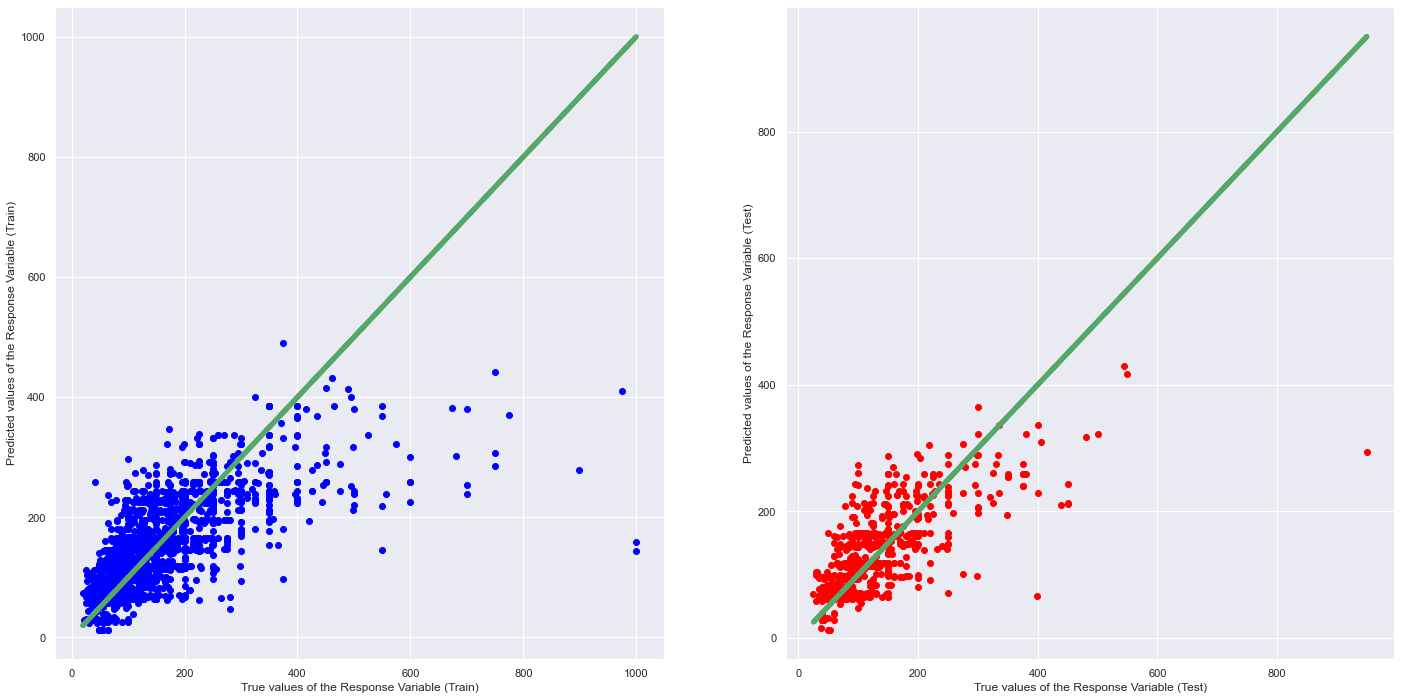

In [76]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train['price'], y_train['price'], 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test['price'], y_test['price'], 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")


### Model 2: Random Forest Regression

In [77]:
# Tuning of Parameters
random_grid = {'n_estimators': [2000],
               'max_features': [2,5],
               'max_depth': [40,70],
               'min_samples_split': [40,50],
               'max_leaf_nodes':[50,70],
               'max_features': [2,5]}
rf_tune = RandomForestRegressor()
rf_random = GridSearchCV(estimator = rf_tune, param_grid = random_grid, cv = 3, verbose=2,n_jobs = 2)

rf_random.fit(X_train,y_train)

print(rf_random.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


RandomForestRegressor(max_depth=70, max_features=5, max_leaf_nodes=50,
                      min_samples_split=40, n_estimators=2000)


In [78]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, 
                           max_depth=70,
                           min_samples_split=40,
                           max_leaf_nodes=50,
                           max_features=5).fit(X_train,y_train)

# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

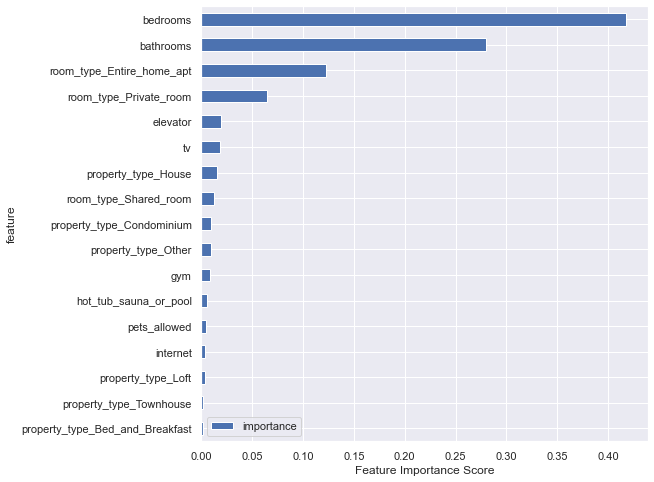

In [79]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

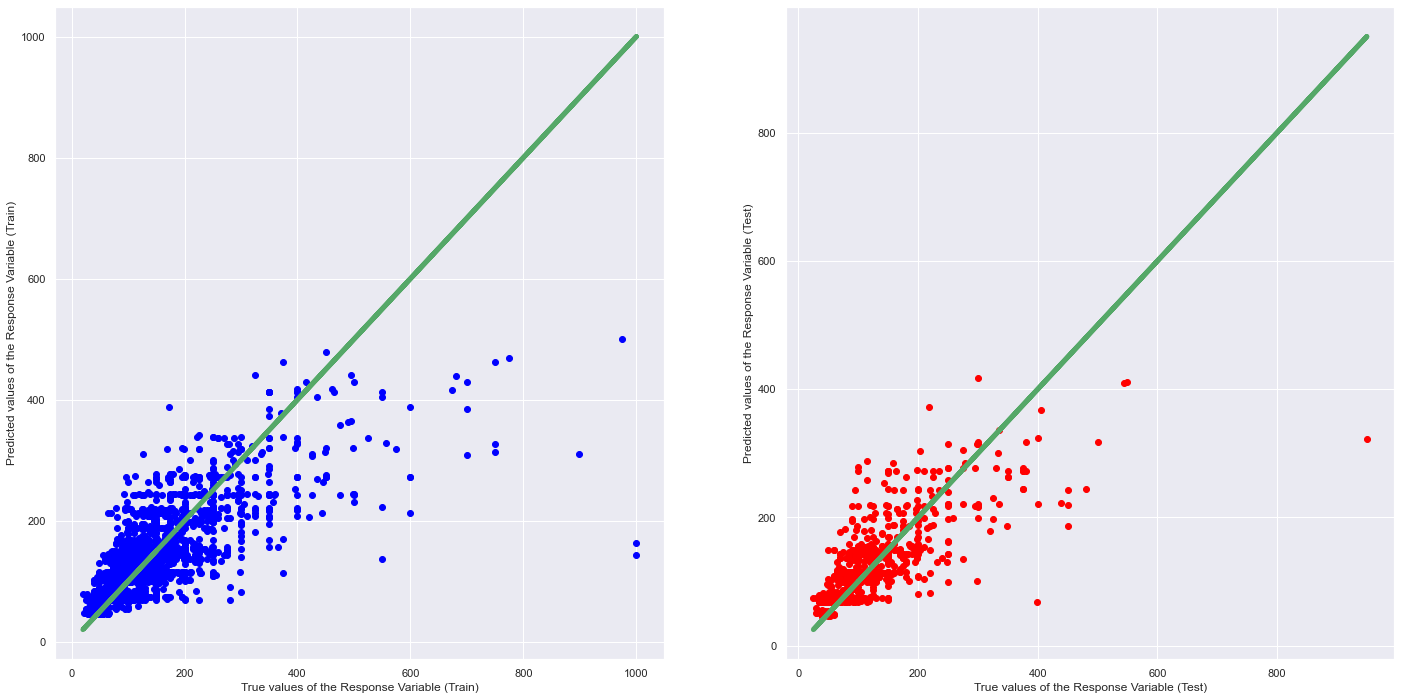

In [80]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train['price'], y_train['price'], 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test['price'], y_test['price'], 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Evaluation of Models

#### Train Test Split
Validation of model performance:
- Train - Test ratio: 80% - 20% 
- Random state: 2 

In [81]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
test_df = pd.DataFrame(
    index=['Linear Regression', 'Random Forest Regression'],
    data={
    'MSE': [
        round(mean_squared_error(y_test, testPredictionLR),4), 
        round(mean_squared_error(y_test, testPredictin_RF),4)
    ],
    'R^2': [
        round(r2_score(y_test, testPredictionLR),4),
        round(r2_score(y_test, testPredictin_RF),4)
    ]
})
train_df = pd.DataFrame(
    index=['Linear Regression', 'Random Forest Regression'],
    data={
    'MSE': [
        round(mean_squared_error(y_train, trainPredictionLR),4), 
        round(mean_squared_error(y_train, trainPredictin_RF),4)
    ],
    'R^2': [
        round(r2_score(y_train, trainPredictionLR),4),
        round(r2_score(y_train, trainPredictin_RF),4)
    ]
})
print(test_df, '\n')
print(train_df)

Goodness Fit on the Models (Train/Test Split):
                                MSE     R^2
Linear Regression         3376.5840  0.5194
Random Forest Regression  3179.5757  0.5475 

                                MSE     R^2
Linear Regression         3936.5995  0.5326
Random Forest Regression  3386.2771  0.5979
